In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data/health.csv')
data = data.drop(columns = ['Unnamed: 0', 'index', 'CASEID'])
data

,SNRLGSVC,SNRLGIMP,SNRLDCSN,SNRLFRND,YEAR,Tabacco_Flag,Alcohol_Flag,Marijunana_Flag,Marijuana_Only_Flag,Cocaine_Flag,...,svrl_days_depressed,lifetime_mde,pst_yr_mde,CATAG6,HEALTH,IRSEX,IRMARIT,EDUCCAT2,NEWRACE2,EMPSTATY
0,6-24,Agree,Agree,Agree,2010,1,1,1,1,0,...,1.0,1.0,1.0,A-18-25,H_Very_good,Male,Not_Married,Some_college,Black/Afr_Am,E_full_time
1,3-5,Disagree,Disagree,Strongly Disagree,2010,1,1,1,1,0,...,0.0,1.0,1.0,A-18-25,H_Excellent,Female,Married,Some_college,White,E_full_time
2,99,99,99,99,2010,0,1,1,1,0,...,0.0,1.0,0.0,A-12-17,H_Good,Female,Not_Married,Edu_youth,Hispanic,E_Other
3,1-2,Agree,Agree,Disagree,2010,1,1,0,0,0,...,0.0,0.0,1.0,A-18-25,H_Fair,Female,Not_Married,Less_than_high_school,White,E_Other
4,6-24,Strongly Agree,Strongly Agree,Agree,2010,1,0,0,0,0,...,1.0,1.0,1.0,A-50-64,H_Fair,Female,Divorced_Separated,High_school_graduate,White,E_Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280320,25-52,Strongly Agree,Agree,Disagree,2014,1,1,0,0,0,...,1.0,1.0,1.0,A-18-25,H_Very_good,Female,Not_Married,High_school_graduate,White,E_full_time
280321,3-5,Strongly Disagree,Agree,Disagree,2014,0,0,0,0,0,...,0.0,0.0,0.0,A-35-49,H_Fair,Female,Divorced_Separated,High_school_graduate,White,E_Other
280322,25-52,Strongly Agree,Strongly Agree,Disagree,2014,1,1,1,0,1,...,1.0,1.0,1.0,A-35-49,H_Excellent,Male,Married,College_graduate,White,E_full_time
280323,6-24,Agree,Agree,Strongly Disagree,2014,0,0,0,0,0,...,0.0,0.0,0.0,A-18-25,H_Very_good,Female,Not_Married,Some_college,White,E_part_time


### Create Suicide Risk

- plan1: think(1), plan(2), attempt(3) : doesn't work out, attempt doesn't ensure plan, and plan doesnt ensure thinking: for people who actually tried, half of them didn't have any plan, and some of them havent thought about killing themselves: something we could put into the slide as an interesting finding (might include some graphs as well)

- plan 2: think(1), think+plan(2), think+plan+attempt(3), but what about those who are attempt only, or plan only, or attempt+think?

- plan 3: think (+1), plan (+2), attempt (+3)


In [3]:
suic = data[['suic_thought_pst_12month', 'suic_thought_pst_yr', 'suic_plan', 'suic_attempt']]
suic

,suic_thought_pst_12month,suic_thought_pst_yr,suic_plan,suic_attempt
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
280320,1.0,0.0,0.0,0.0
280321,0.0,1.0,1.0,0.0
280322,1.0,0.0,0.0,0.0
280323,1.0,0.0,0.0,0.0


In [4]:
suicide_risk = suic['suic_thought_pst_yr'] + 2*suic['suic_plan'] + 3*suic['suic_attempt']
suicide_risk.value_counts()

0.0    262867
1.0     11561
3.0      2781
2.0      1369
6.0      1312
4.0       420
5.0        15
Name: count, dtype: int64

In [5]:
data = data.assign(suicide_risk = suicide_risk)
data = data.drop(columns = ['YEAR', 'Age_First_Use', 'Year_First_Use', 
                            'CPN_Meth_Flag', 'Any_Drug_Past_Year', 'Any_Drug_Past_Month'])


In [6]:
data.columns

Index(['SNRLGSVC', 'SNRLGIMP', 'SNRLDCSN', 'SNRLFRND', 'Tabacco_Flag',
       'Alcohol_Flag', 'Marijunana_Flag', 'Marijuana_Only_Flag',
       'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag', 'Hallcinogens_Flag',
       'Inhalants_Flag', 'Painkiller_Flag', 'Tranquilizer_Flag',
       'Stimulant Flag', 'Meth_Flag', 'Sedatives Flag', 'Any_Drug_Flag',
       'Drug_Not_Marijunana', 'Ever_Steal_50', 'Sell_Illegal_Drugs',
       'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year', 'inpatient',
       'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt',
       'suic_thought_pst_12month', 'psych_distress_month', 'psych_distress_yr',
       'suic_thought_pst_yr', 'suic_plan', 'suic_attempt', 'whodas_score',
       'predicted_ment_ill', 'svrl_days_depressed', 'lifetime_mde',
       'pst_yr_mde', 'CATAG6', 'HEALTH', 'IRSEX', 'IRMARIT', 'EDUCCAT2',
       'NEWRACE2', 'EMPSTATY', 'suicide_risk'],
      dtype='object')

In [7]:
data = data[data['SNRLGSVC'] != '99']
data = data[data['SNRLGIMP'] != '99']
data = data[data['SNRLDCSN'] != '99']
data = data[data['SNRLFRND'] != '99']
data = data[data['Sell_Illegal_Drugs'] != '97']
data = data[data['Sell_Illegal_Drugs'] != '94']

In [8]:
data['SNRLGSVC'].replace(['0', '1-2', '3-5', '6-24', '25-52', '52+', '99'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)
data['SNRLGIMP'].replace(['Strongly Agree', 'Agree', 'Disagree', 'Strongly Disagree'],
                        [0, 1, 2, 3], inplace=True)
data['SNRLDCSN'].replace(['Strongly Agree', 'Agree', 'Disagree', 'Strongly Disagree'],
                        [0, 1, 2, 3], inplace=True)
data['SNRLFRND'].replace(['Strongly Agree', 'Agree', 'Disagree', 'Strongly Disagree'],
                        [0, 1, 2, 3], inplace=True)
data['Ever_Steal_50'].replace(['0', '1-2', '3-5', '6-9', '>=10'],
                        [0, 1, 2, 3, 4], inplace=True)
data['Sell_Illegal_Drugs'].replace(['0', '1-2', '3-5', '6-9', '>=10'],
                        [0, 1, 2, 3, 4], inplace=True)
data['Ever_Booked_Arrested'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)
data['Drug_or_Alc_Past_year'].replace(['No/Unknown', 'Yes'],
                        [0, 1], inplace=True)

data['CATAG6'].replace(['A-18-25', 'A-26-34', 'A-35-49','A-50-64','A-65' ], #AGE CATEGORY RECODE 
                        [0, 1, 2, 3, 4], inplace=True)
data['HEALTH'].replace(['H_Very_good', 'H_Excellent', 'H_Good', 'H_Fair', 'H_Poor'],
                        [0, 1, 2, 3, 4], inplace=True)
data['IRSEX'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)
data['IRMARIT'].replace(['Not_Married', 'Married', 'Divorced_Separated', 'Widowed'],
                        [0, 1, 2, 3], inplace=True)
data['EDUCCAT2'].replace(['Less_than_high_school', 'High_school_graduate', 'Some_college','College_graduate'],
                        [0, 1, 2, 3], inplace=True)
data['NEWRACE2'].replace(['Black/Afr_Am', 'White', 'Hispanic', 'more_than_one_race', 'Asian',
 'Native_Am/AK_Native', 'Native_HI/Other_Pac_Isl'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)
data['EMPSTATY'].replace(['E_full_time', 'E_Other', 'E_Unemployed', 'E_part_time'],
                        [0, 1, 2, 3], inplace=True)

In [9]:
map_col = {'SNRLGSVC':'RELIG_SERVICES_12month', 'SNRLGIMP':'RELIG_IMPORTANT', 
           'SNRLDCSN':'RELIG_influ_decision', 'SNRLFRND': 'friend_SHARE_REL', 
           'CATAG6':'age'}
data = data.rename(columns=map_col)

In [10]:
import numpy as np
def normalize(series):
    """
    normalize a series
    """
    array = np.array(series)
    array_norm = (array-np.min(array))/(np.max(array)-np.min(array))
    return pd.Series(array_norm)

norm_data = pd.DataFrame()
for col in data.columns:
    norm_data[col] = normalize(data[col])

In [11]:
norm_data.to_csv('data/new_health.csv')

In [12]:
# from sklearn.manifold import TSNE, MDS

# X = data[['Tabacco_Flag', 'Alcohol_Flag', 'Marijunana_Flag', 'Marijuana_Only_Flag', 'Cocaine_Flag']].values.tolist()
# y = pd.factorize(data['suicide_risk'])[0]
# y = y.tolist()

# dims = TSNE(random_state=42).fit_transform(X)
# dim1, dim2 = dims[:, 0], dims[:, 1]
# sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False)
# plt.title('t-SNE')

In [13]:
print(suic[suic['suic_thought_pst_yr'] == 1.0].suic_plan.value_counts())
#for those who have thought about it, few of them made plan

print(suic[suic['suic_thought_pst_yr'] == 0.0].suic_plan.value_counts())
#for those who have never thought about it, small porportion of them made plan

print(suic[suic['suic_thought_pst_yr'] == 1.0].suic_attempt.value_counts())
#for those who have thought ab it, only have few actually tried

print(suic[suic['suic_thought_pst_yr'] == 0.0].suic_attempt.value_counts())
#for those who have never thought ab it, a very small porportion of them have few actually tried

print(suic[suic['suic_attempt'] == 1.0].suic_plan.value_counts())
#for those who have attempted suicide, half made plan

print(suic[suic['suic_attempt'] == 1.0].suic_thought_pst_yr.value_counts())
#for those who have attempted suicide, majority thought about it

print(suic[suic['suic_plan'] == 1.0].suic_thought_pst_yr.value_counts())
#for those who have made plan, majority have thought ab it

suic[suic['suic_plan'] == 0.0].suic_thought_pst_yr.value_counts()
#for those who dont have any plan, only a few thought about it

suic_plan
0.0    11981
1.0     3327
Name: count, dtype: int64
suic_plan
0.0    263633
1.0      1384
Name: count, dtype: int64
suic_attempt
0.0    13576
1.0     1732
Name: count, dtype: int64
suic_attempt
0.0    264236
1.0       781
Name: count, dtype: int64
suic_plan
1.0    1327
0.0    1186
Name: count, dtype: int64
suic_thought_pst_yr
1.0    1732
0.0     781
Name: count, dtype: int64
suic_thought_pst_yr
1.0    3327
0.0    1384
Name: count, dtype: int64


suic_thought_pst_yr
0.0    263633
1.0     11981
Name: count, dtype: int64

### Explore Linear Correlation Between Every Feature and "Suicide-Risk" (Predictive Variable)

In [14]:
norm_data['suicide_risk'].value_counts()

suicide_risk
0.000000    178945
0.166667      6795
0.500000      1896
1.000000      1279
0.666667       374
0.333333         6
Name: count, dtype: int64

In [15]:
correlation_df = norm_data.corr().sort_values('suicide_risk', ascending = False) # using new_health.csv
# a dictionary whose values are the correlation score between each feature and suicide_risk, sorted in order
corr_in_order = {}
for col in correlation_df:
    corr_in_order[col] = correlation_df['suicide_risk'].loc[col].round(3)
corr_in_order = sorted(corr_in_order.items(), key=lambda item: abs(item[1]), reverse = True)
corr_in_order

#whodas_score: indicate the level of difficulty in performing daily activities due to problems with emotions, 
#nerves, or mental health.

[('suicide_risk', 1.0),
 ('suic_plan', 0.858),
 ('suic_attempt', 0.819),
 ('suic_thought_pst_yr', 0.764),
 ('suic_thought_pst_12month', -0.582),
 ('predicted_ment_ill', 0.459),
 ('psych_distress_yr', 0.301),
 ('psych_distress_month', 0.299),
 ('pst_yr_mde', -0.292),
 ('whodas_score', 0.262),
 ('lifetime_mde', -0.245),
 ('needed_not_rcvd', -0.243),
 ('inpatient', -0.229),
 ('outpatient', -0.179),
 ('rcvd_any_tmt', -0.178),
 ('svrl_days_depressed', -0.162),
 ('Ever_Steal_50', 0.091),
 ('Sell_Illegal_Drugs', 0.076),
 ('HEALTH', 0.072),
 ('age', -0.065),
 ('EDUCCAT2', -0.053),
 ('RELIG_IMPORTANT', 0.052),
 ('RELIG_influ_decision', 0.052),
 ('Ever_Booked_Arrested', 0.046),
 ('EMPSTATY', 0.045),
 ('IRMARIT', -0.042),
 ('friend_SHARE_REL', 0.04),
 ('RELIG_SERVICES_12month', -0.039),
 ('Drug_Not_Marijunana', 0.039),
 ('Painkiller_Flag', 0.038),
 ('Tranquilizer_Flag', 0.037),
 ('Any_Drug_Flag', 0.034),
 ('Drug_or_Alc_Past_year', 0.032),
 ('Marijunana_Flag', 0.029),
 ('Crack_Flag', 0.029),
 ('Ha

/Users/vickyli/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


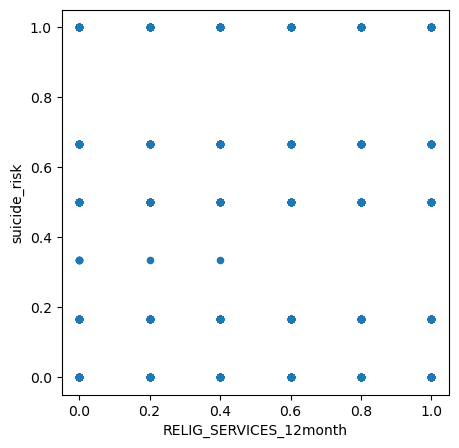

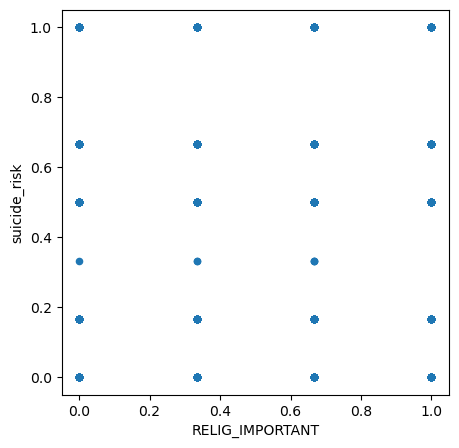

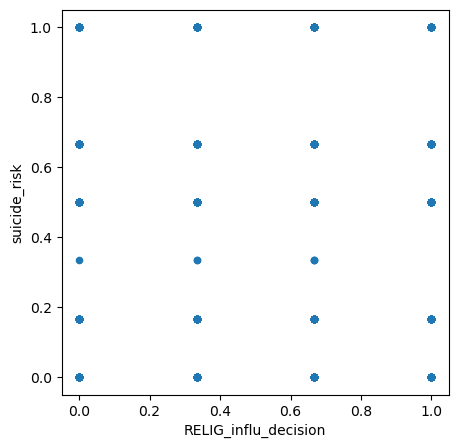

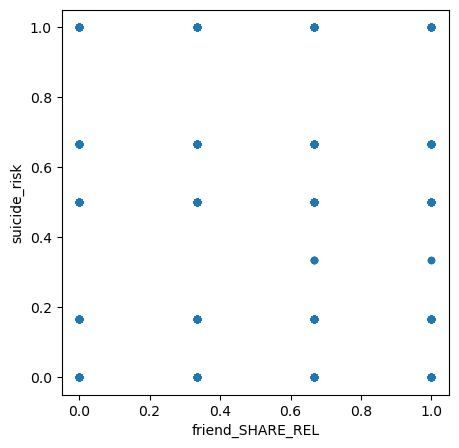

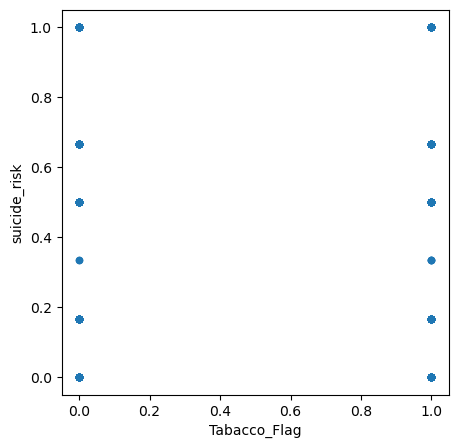

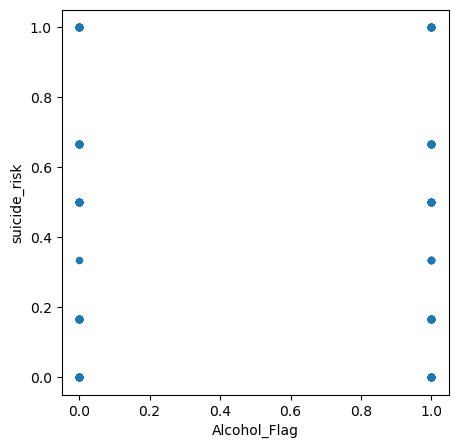

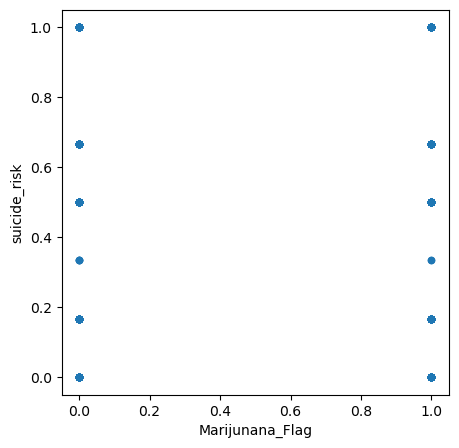

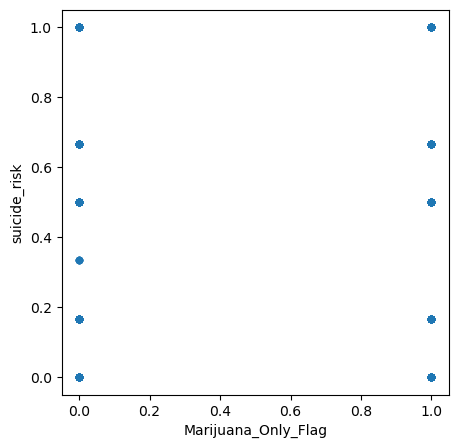

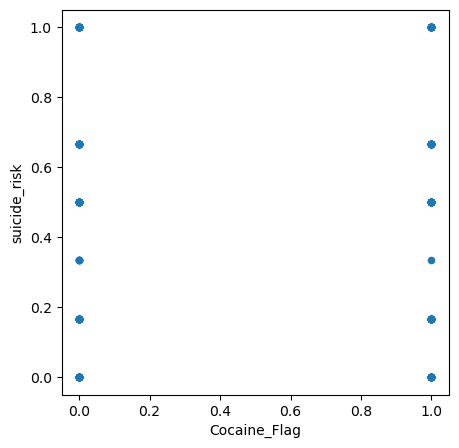

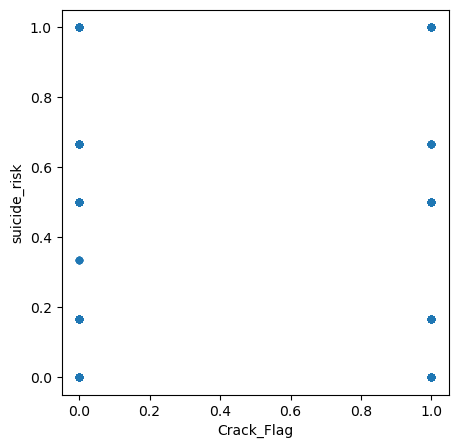

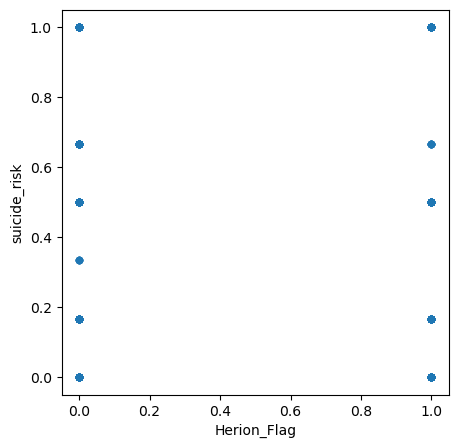

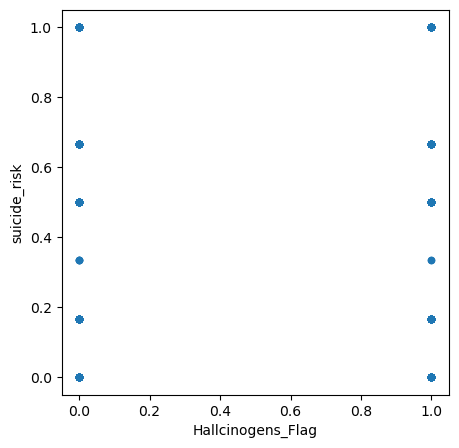

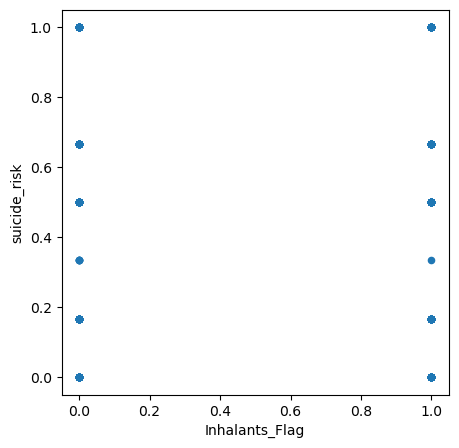

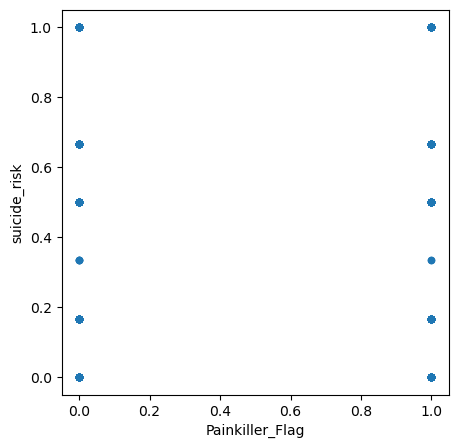

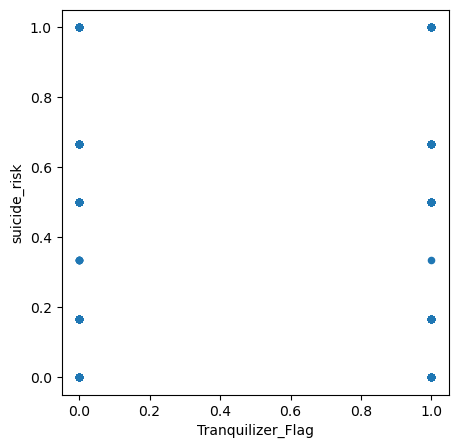

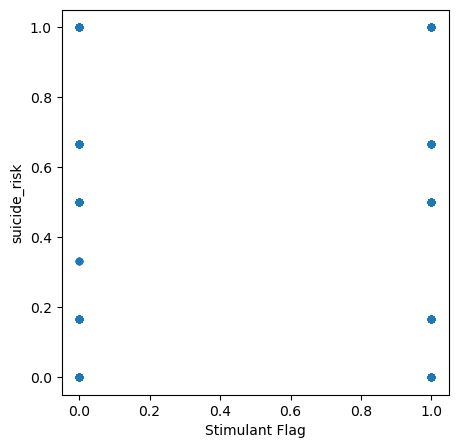

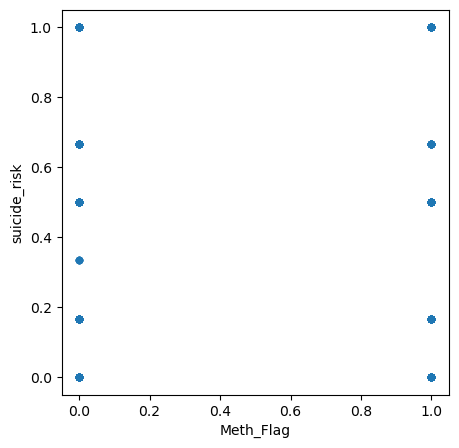

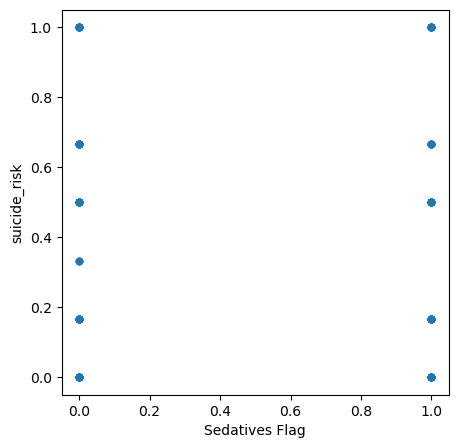

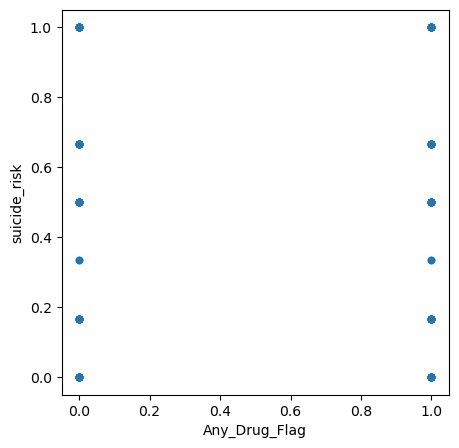

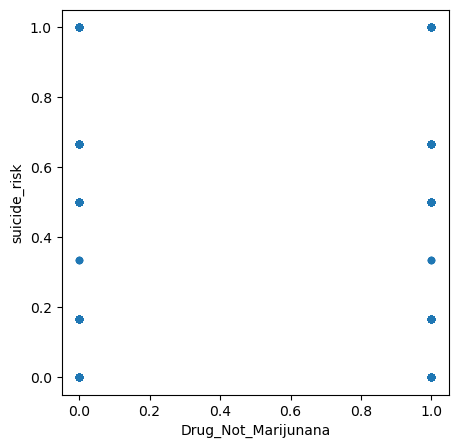

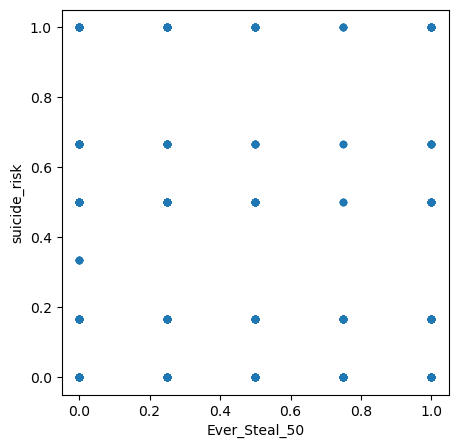

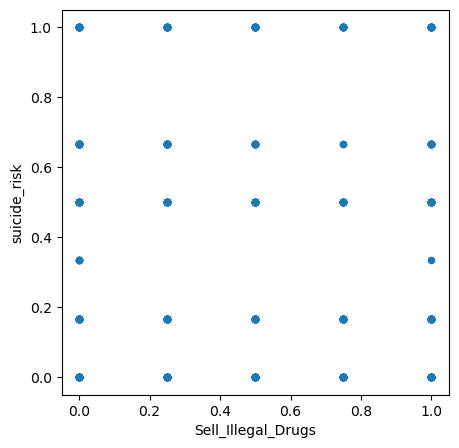

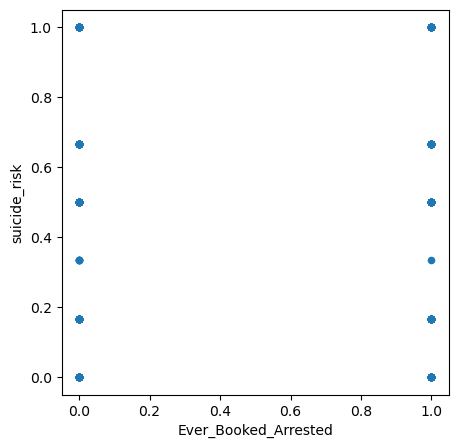

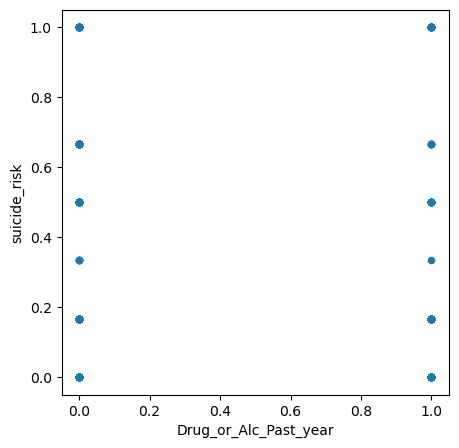

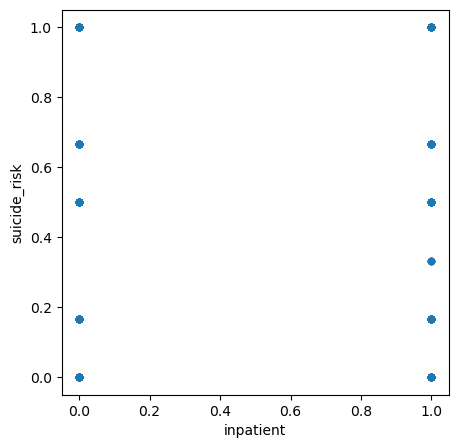

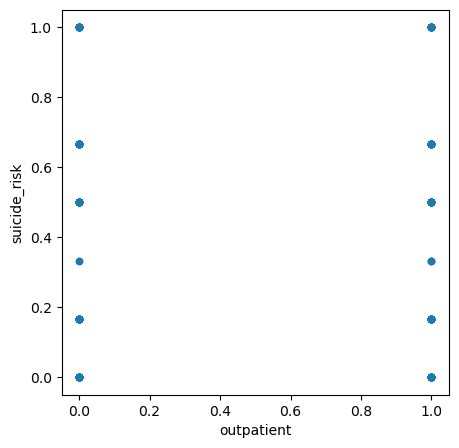

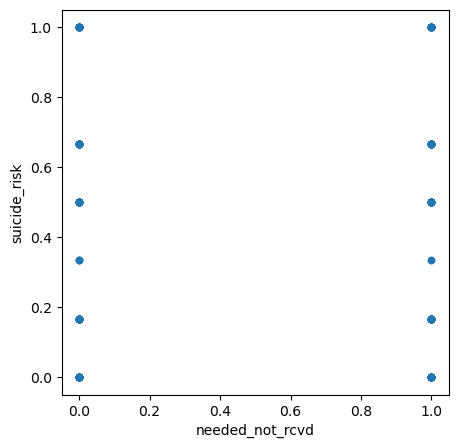

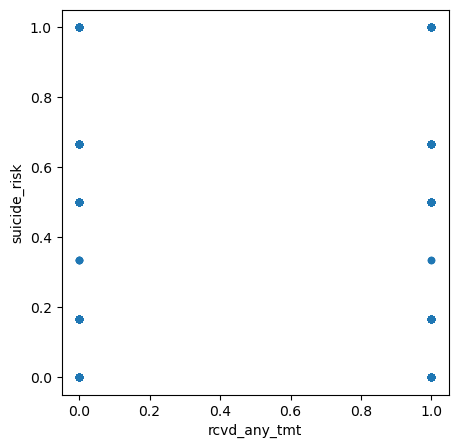

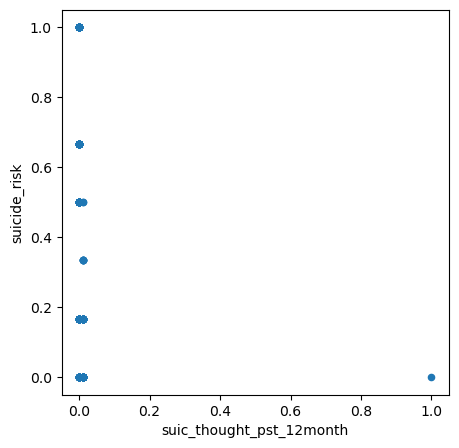

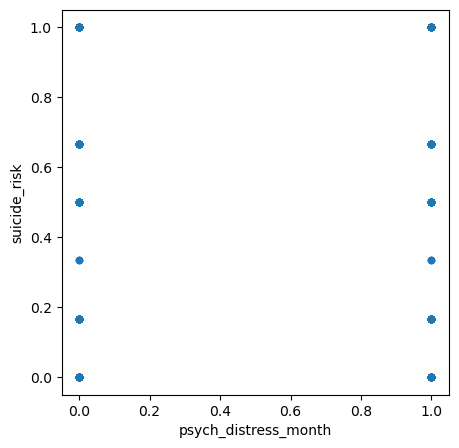

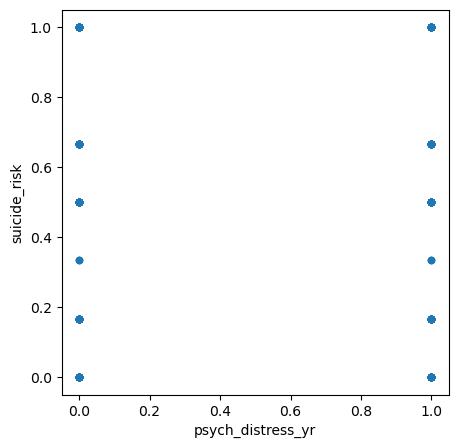

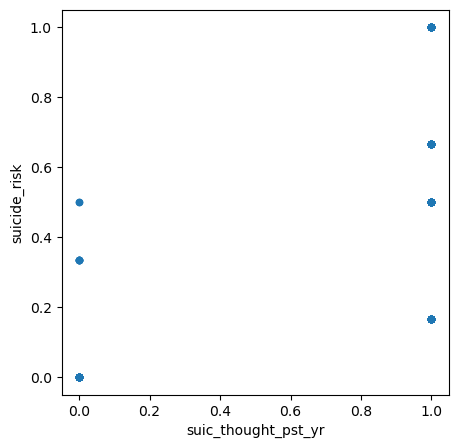

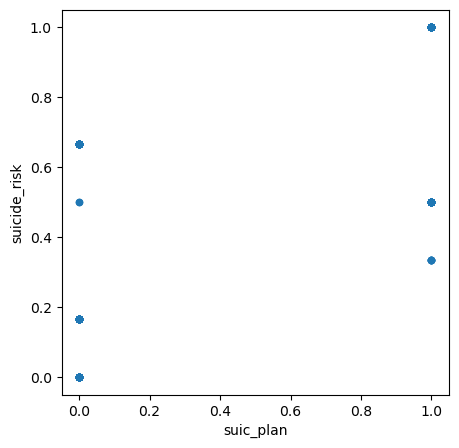

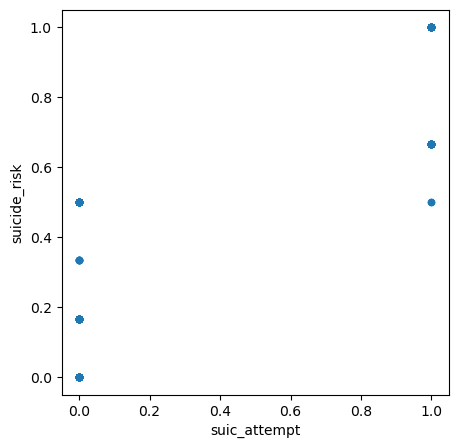

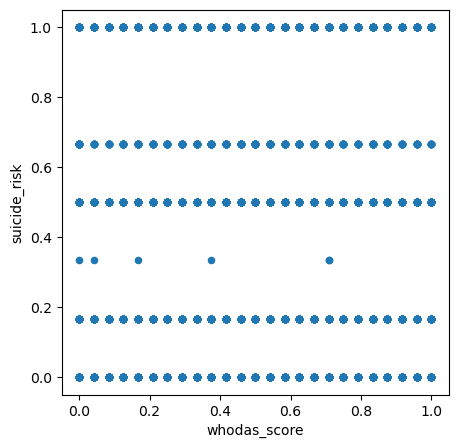

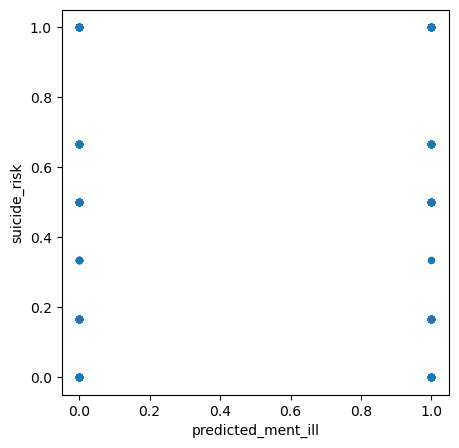

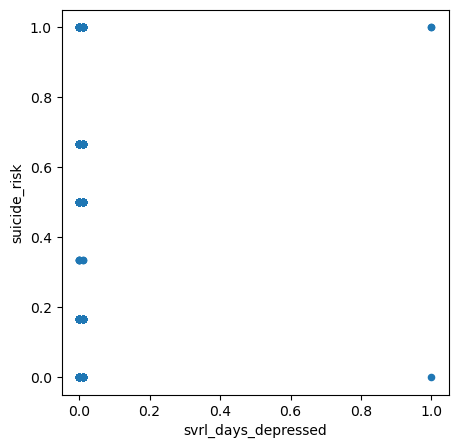

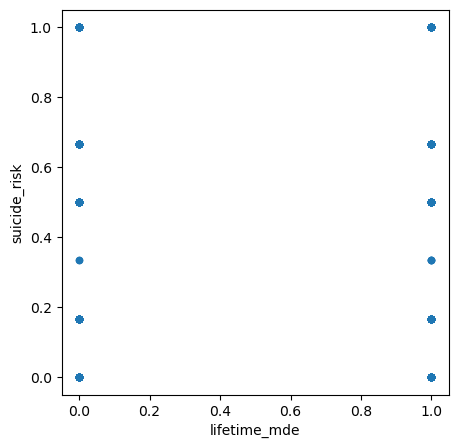

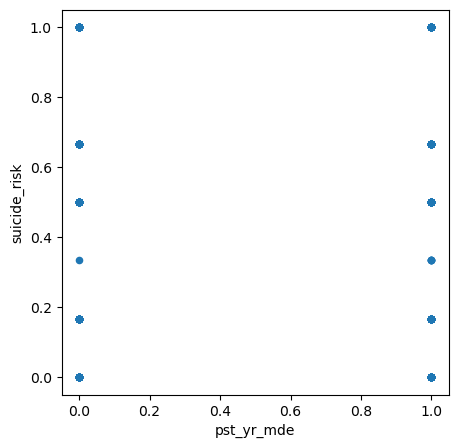

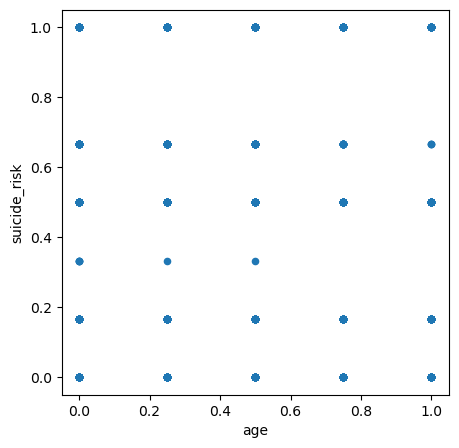

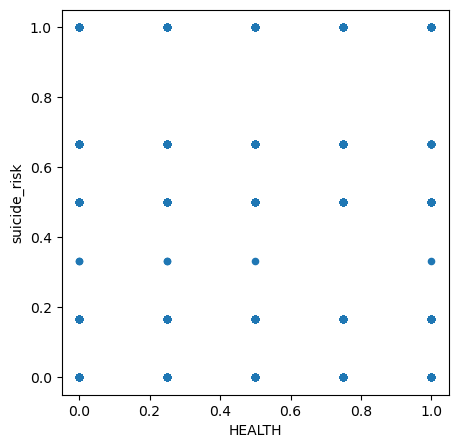

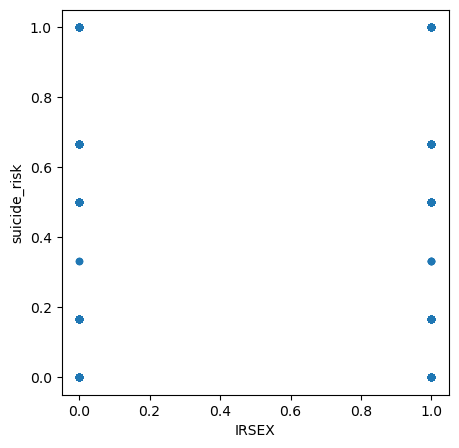

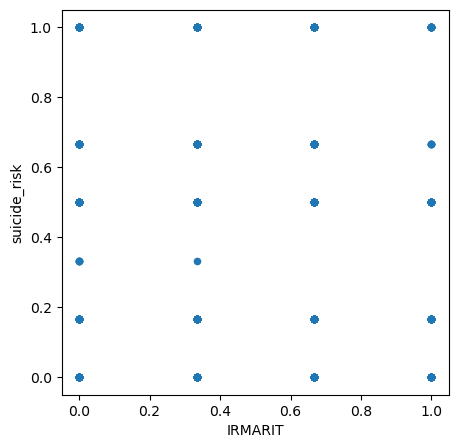

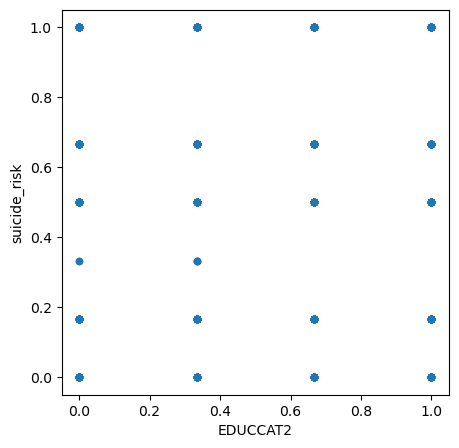

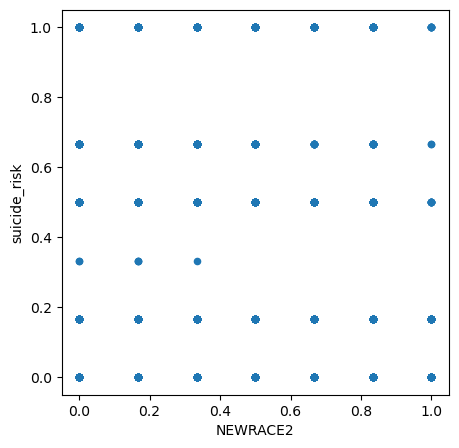

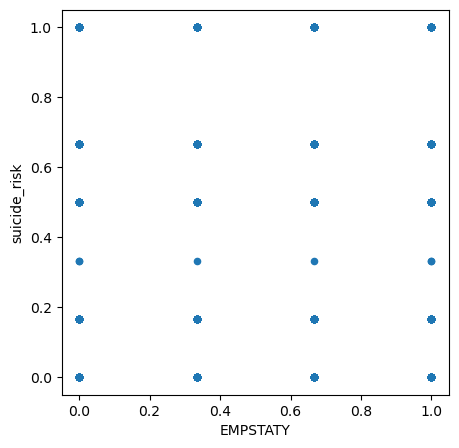

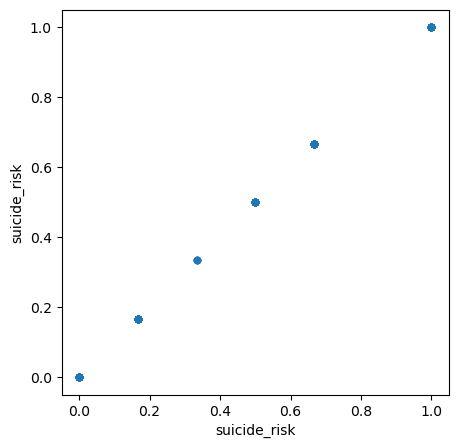

In [16]:
#scatter plot
for col in norm_data:
    norm_data.plot(kind = 'scatter', x = col, y = 'suicide_risk', figsize = (5, 5))

array([[<Axes: title={'center': 'EMPSTATY'}>,
        <Axes: title={'center': 'suicide_risk'}>]], dtype=object)

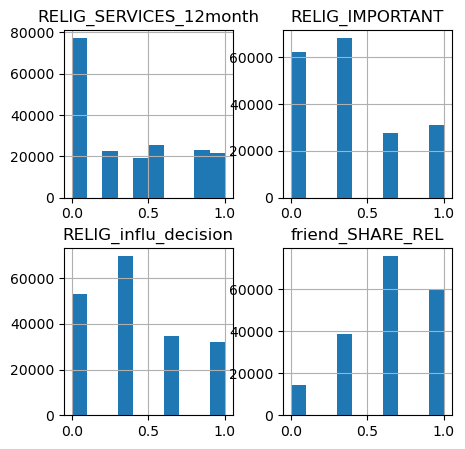

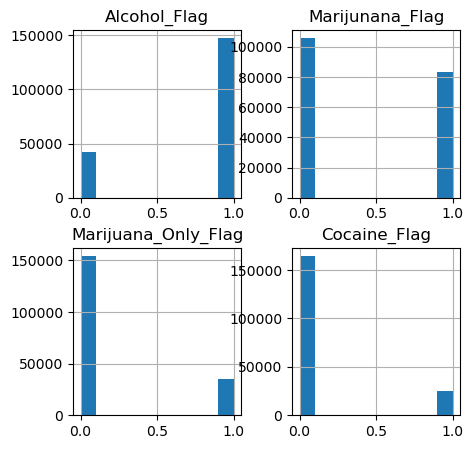

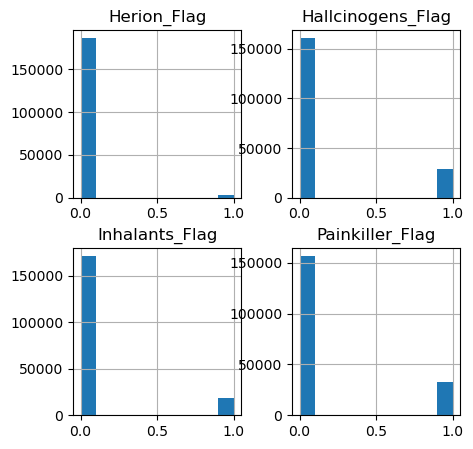

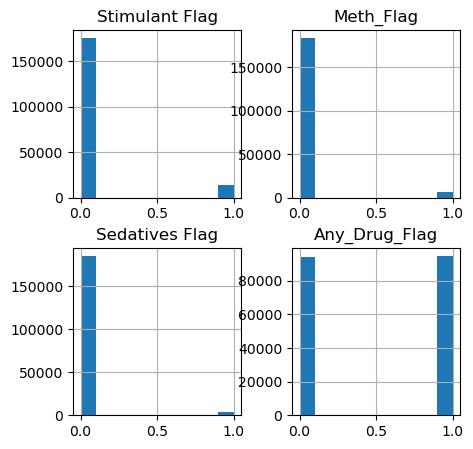

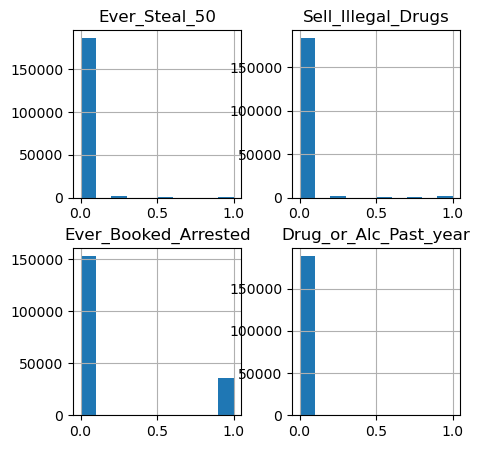

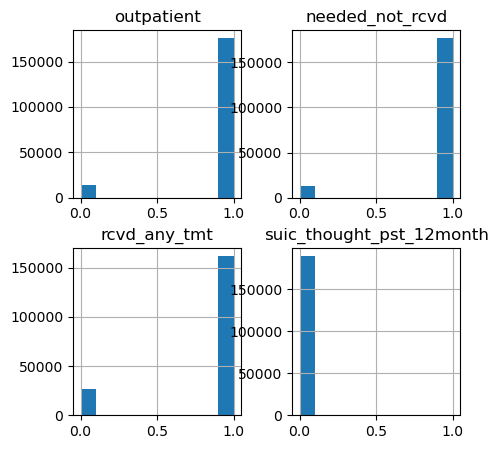

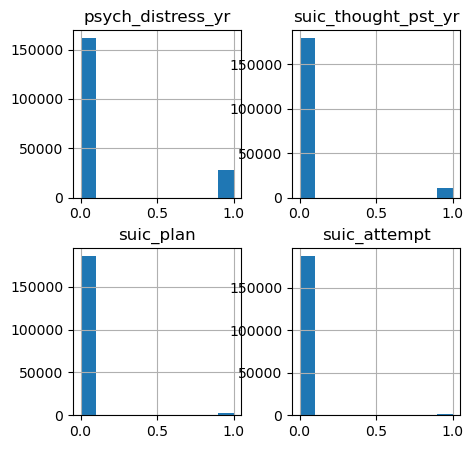

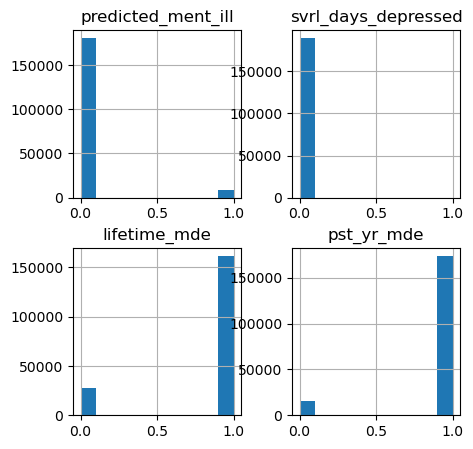

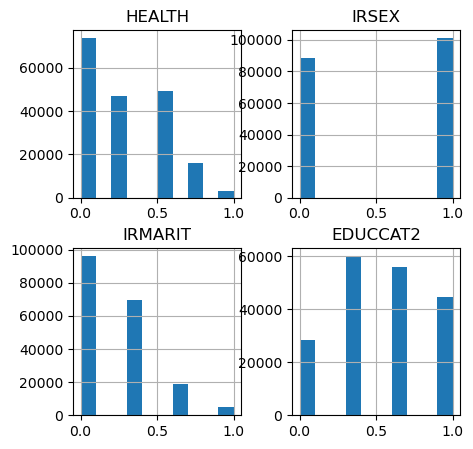

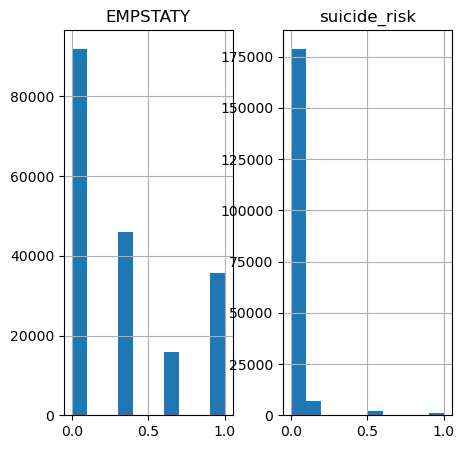

In [40]:
#histogram plot
lower = 0
upper = 4
while upper < len(norm_data.columns):
    norm_data[norm_data.columns[lower:upper]].hist(figsize = (5,5))
    lower = upper + 1
    upper = lower + 4
upper = len(norm_data.columns)
norm_data[norm_data.columns[lower:upper]].hist(figsize = (5,5))